In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data
df = pd.read_csv(r'Sales Data.csv')

# Display the first few rows and summary statistics
print(df.head(5))#it will show top coloumn
print(df.info())#it will show all info about data
print(df.describe())#it will show statistical formula like mean mode



   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0 

In [47]:

# Handle missing values
df.isnull().sum()#in data there is no null value present

# Convert data types if necessary
df['Order Date']=pd.to_datetime(df['Order Date'])
print(df.info())#we convert data type to convert text into date 
# Create any new columns needed for analysis

df['pincode']=['145214']*len(df)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data colu

C:\Users\admin\AppData\Local\Temp\ipykernel_2764\3667100973.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date']=pd.to_datetime(df['Order Date'])


C:\Users\admin\AppData\Local\Temp\ipykernel_2764\730331843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df, x="Sales", y="Product", palette=palette)
C:\Users\admin\AppData\Local\Temp\ipykernel_2764\730331843.py:23: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(data=df, x="Sales", y="Product", palette=palette)


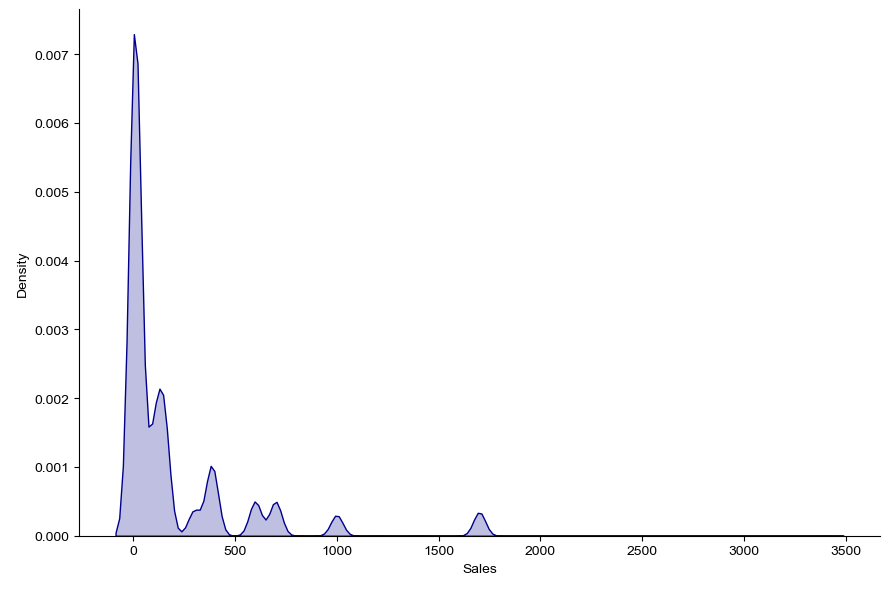

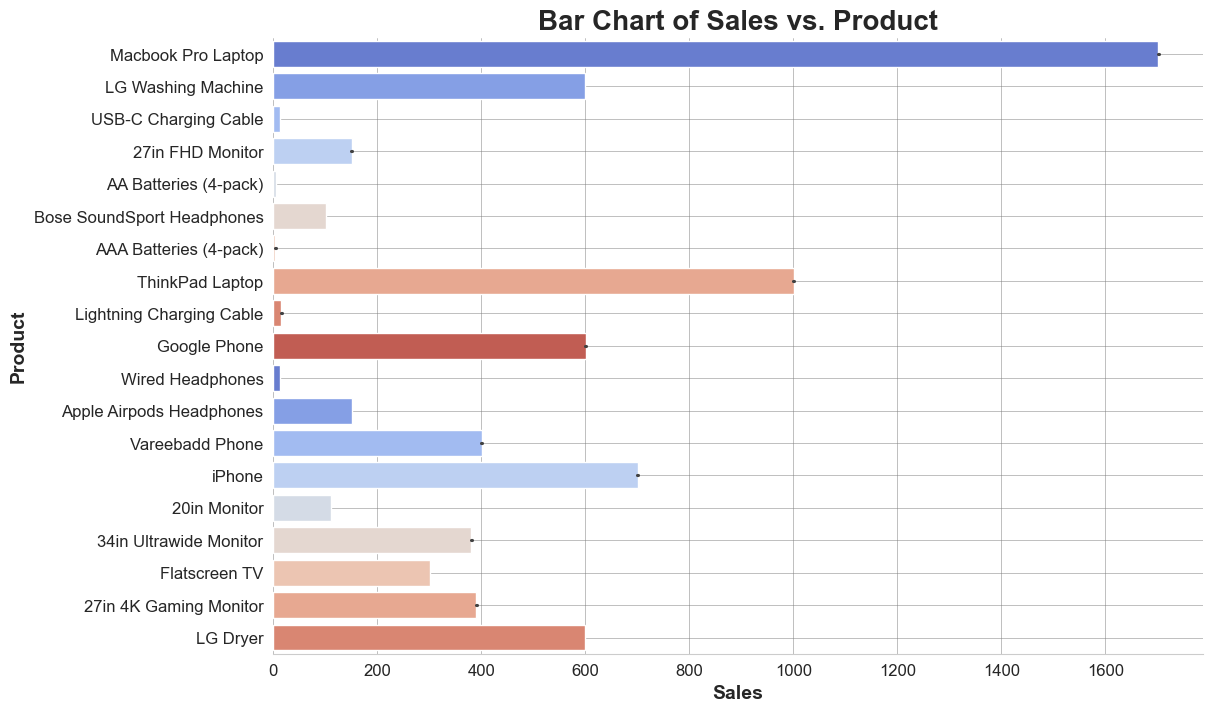

In [49]:

# Univariate analysis
#take one value and create a graph or analyse single value



plot = sns.displot(
    data=df, 
    x="Sales", 
    kind="kde", 
    height=6, 
    aspect=1.5, 
    color="darkblue", 
    fill=True)

# Bivariate analysis

#Bar chart

sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", n_colors=10)  

plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df, x="Sales", y="Product", palette=palette)
barplot.set_title("Bar Chart of Sales vs. Product", fontsize=20, weight='bold')
barplot.set_xlabel("Sales", fontsize=14, weight='bold')
barplot.set_ylabel("Product", fontsize=14, weight='bold')

barplot.spines['top'].set_visible(False)
barplot.spines['right'].set_visible(False)
barplot.spines['left'].set_visible(False)
barplot.spines['bottom'].set_visible(True)
barplot.xaxis.set_ticks_position('none')
barplot.yaxis.set_ticks_position('none')
barplot.xaxis.set_tick_params(labelsize=12)
barplot.yaxis.set_tick_params(labelsize=12)
barplot.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)


plt.show()






In [14]:

# Summary statistics for key variables

summary_stats = df.describe(include='all')
print(summary_stats)
# Grouped statistics

grouped_stats = df.groupby('City').agg({
    'Sales': ['mean', 'std', 'min', 'max'],
    'Quantity Ordered': ['mean', 'std', 'min', 'max']
})

print(grouped_stats)




           Unnamed: 0       Order ID               Product  Quantity Ordered  \
count   185950.000000  185950.000000                185950     185950.000000   
unique            NaN            NaN                    19               NaN   
top               NaN            NaN  USB-C Charging Cable               NaN   
freq              NaN            NaN                 21903               NaN   
mean      8340.388475  230417.569379                   NaN          1.124383   
std       5450.554093   51512.737110                   NaN          0.442793   
min          0.000000  141234.000000                   NaN          1.000000   
25%       3894.000000  185831.250000                   NaN          1.000000   
50%       7786.000000  230367.500000                   NaN          1.000000   
75%      11872.000000  275035.750000                   NaN          1.000000   
max      25116.000000  319670.000000                   NaN          9.000000   

           Price Each           Order D


### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [9]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions


import numpy as np
from scipy.stats import ttest_ind

# Sample sales data for two cities
city_a_sales = [1700, 600, 11.95, 3.84]
city_b_sales = [23.9, 99.99, 11.96]

# Perform independent t-test
t_statistic, p_value = ttest_ind(city_a_sales, city_b_sales)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Significant difference in sales between cities")
else:
    print("No significant difference in sales between cities")


# Example: Chi-square test for independence between Ship Mode and Customer Segment


import pandas as pd

# Load your sales data from a CSV or Excel file
data = pd.read_csv('Sales Data.csv')  # Replace with your file path

# Check the first few rows of the dataset
print(data.head())

# Check the column names to identify the relevant columns
print(data.columns)

# Create the contingency table
contingency_table = pd.crosstab(data['Product'], data['City'])
print(contingency_table)

import scipy.stats as stats

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")



T-statistic: 1.129338140761255
P-value: 0.3100051211739053
No significant difference in sales between cities
   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38  

                  Quantity Ordered  Price Each     Sales      Hour
Quantity Ordered          1.000000   -0.269788 -0.263305 -0.117100
Price Each               -0.269788    1.000000  0.999955 -0.781561
Sales                    -0.263305    0.999955  1.000000 -0.784426
Hour                     -0.117100   -0.781561 -0.784426  1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

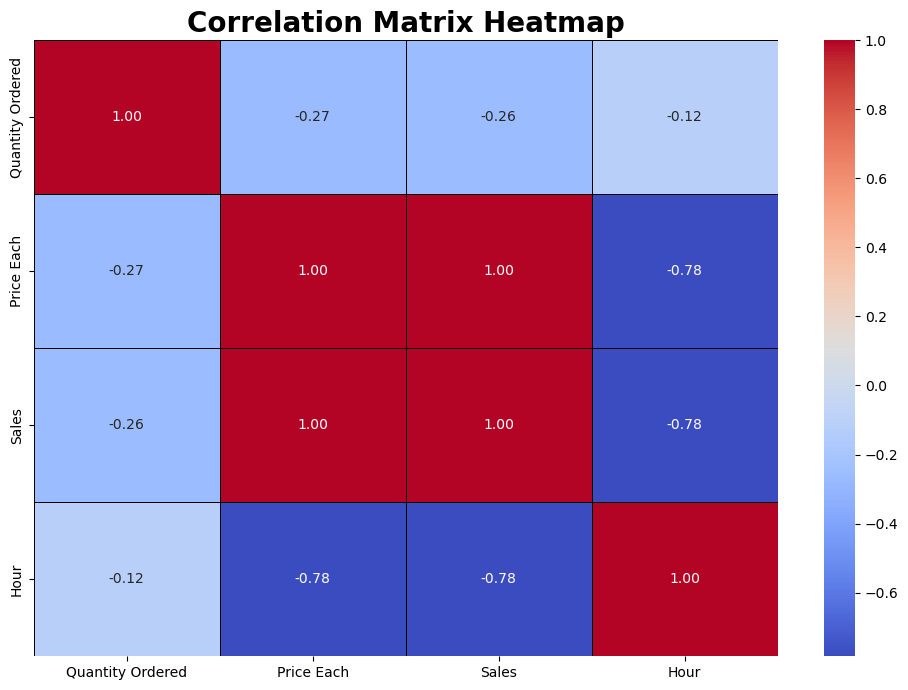

In [24]:
# Selecting only numeric columns for correlation matrix
import pandas as pd

# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')

# Creating a correlation matrix
correlation_matrix = numeric_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Selecting only numeric columns for correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_df = df.select_dtypes(include='number')

# Creating a correlation matrix
correlation_matrix = numeric_df.corr()

# Creating the heatmap with clear numbering for all cells
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='black')
heatmap.set_title("Correlation Matrix Heatmap", fontsize=20, weight='bold')





C:\Users\admin\AppData\Local\Temp\ipykernel_2764\4264762509.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\admin\AppData\Local\Temp\ipykernel_2764\4264762509.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = data.resample('M', on='Order Date')['Sales'].sum()


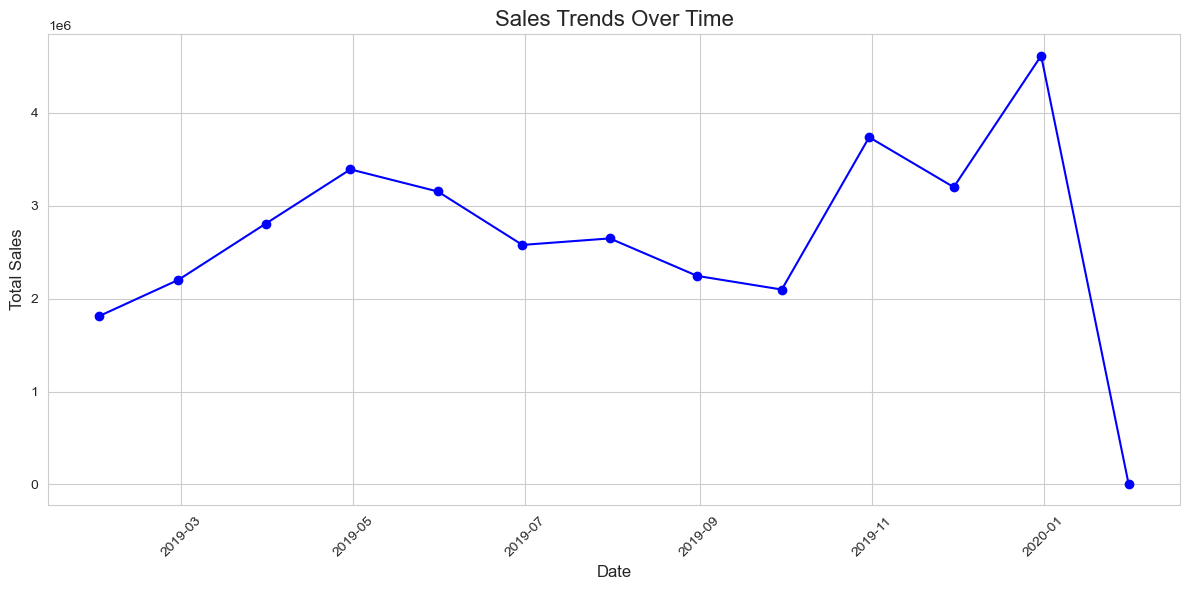

C:\Users\admin\AppData\Local\Temp\ipykernel_2764\4264762509.py:29: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\admin\AppData\Local\Temp\ipykernel_2764\4264762509.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = data.resample('M', on='Order Date')['Sales'].sum()


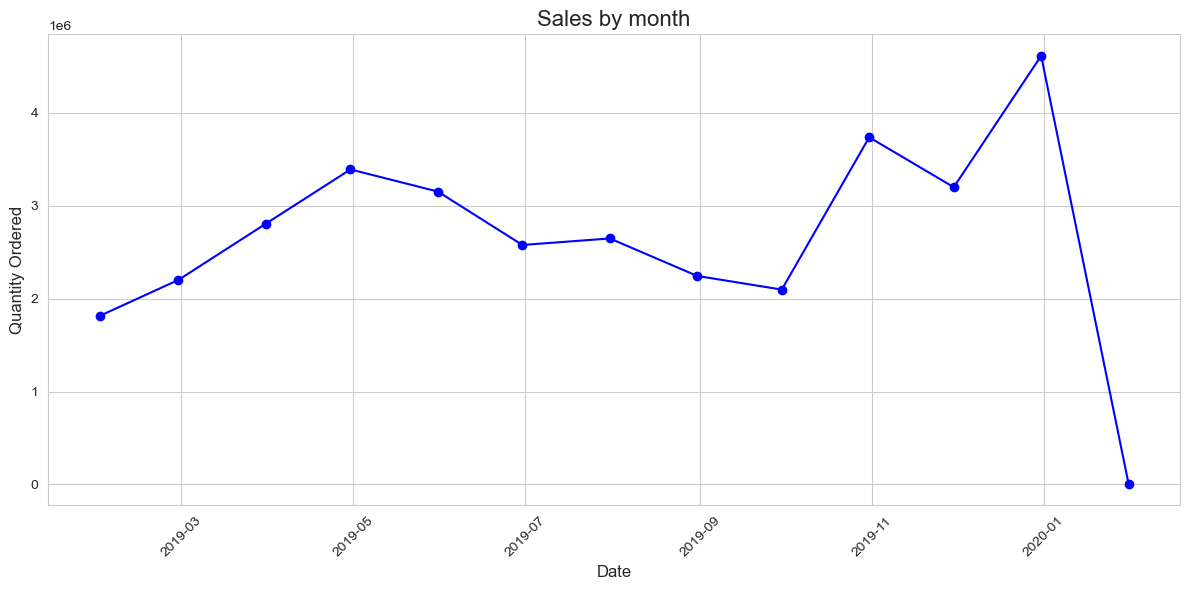

In [51]:

# Plotting sales trends over time
import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by month
sales_trend = data.resample('M', on='Order Date')['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend, marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Resample sales data by month



import matplotlib.pyplot as plt
data = pd.read_csv('Sales Data.csv')
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate sales by month
sales_trend = data.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend, marker='o', linestyle='-', color='b')
plt.title('Sales by month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


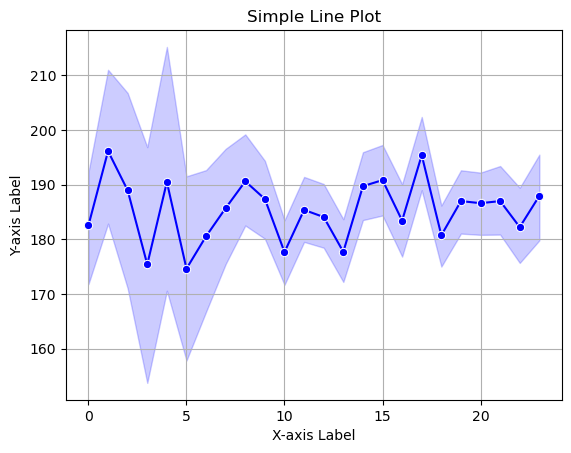

In [19]:

# Plotting profit trends over time



# Plotting profit trends over time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('Sales Data.csv')

# Aggregate sales by month
# Create a line plot

sns.lineplot(x=data["Hour"], y=data["Sales"], data=data, marker='o', color='blue')

# Customize the appearance
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')
plt.grid(True)  # Add gridlines

# Show the plot
plt.show()




<Axes: xlabel='Sales', ylabel='Product'>

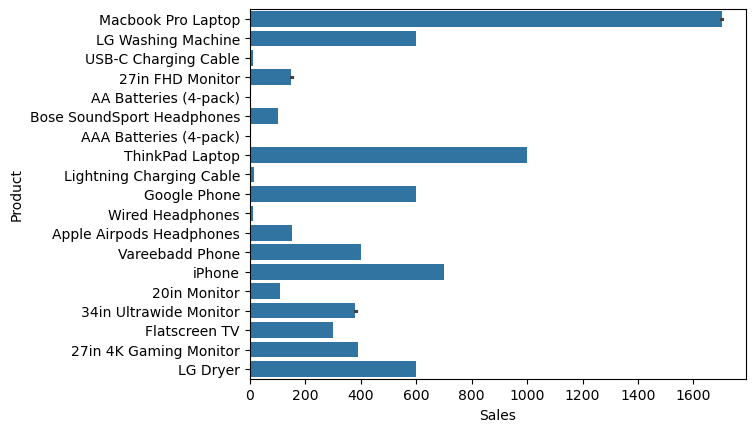

In [7]:

# Identifying top-performing product categories based on total sales and profit




# Plotting total sales by product category

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.barplot(data, x="Sales", y="Product")











In [23]:

# Generating summary statistics for each region

summary_stats = data.groupby('City')['Sales'].agg(
    total_sales='sum',
    average_sales='mean',
    transaction_count='count'
).reset_index()

# Display the summary statistics
print(summary_stats)

# 




             City  total_sales  average_sales  transaction_count
0         Atlanta   2795498.58     187.856903              14881
1          Austin   1819581.75     183.703357               9905
2          Boston   3661642.01     183.688272              19934
3          Dallas   2767975.40     186.772969              14820
4     Los Angeles   5452570.80     184.177362              29605
5   New York City   4664317.43     187.502711              24876
6        Portland   2320490.61     186.160498              12465
7   San Francisco   8262203.91     184.704550              44732
8         Seattle   2747755.48     186.516120              14732


C:\Users\admin\AppData\Local\Temp\ipykernel_2764\2523754021.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Price Each', y='Sales', data=data, palette='viridis')


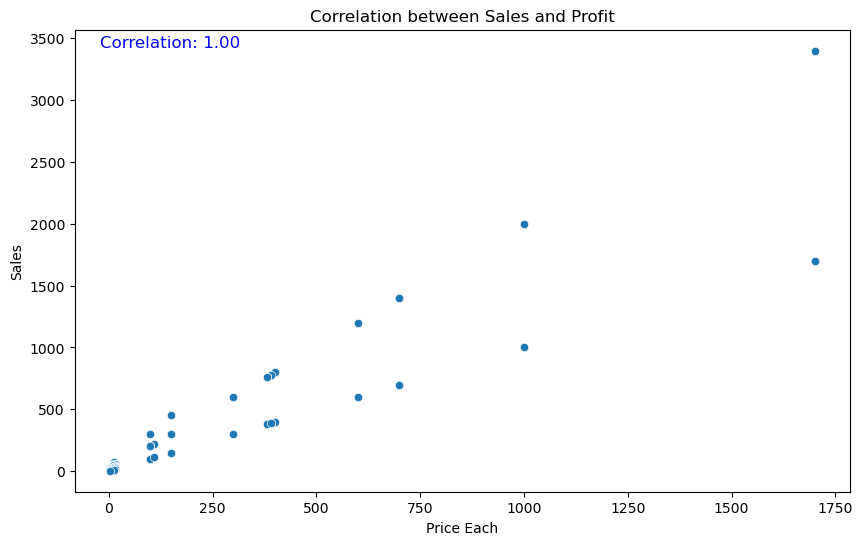

In [29]:


# Visualizing the correlation between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Sales', data=data, palette='viridis')

# Add labels and title
plt.title('Correlation between Sales and Profit')
plt.xlabel('Price Each')
plt.ylabel('Sales')

# Displaying the correlation coefficient (optional)
correlation = data['Price Each'].corr(data['Sales'])
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')

# Show the plot
plt.show()



# Displaying the correlation coefficient






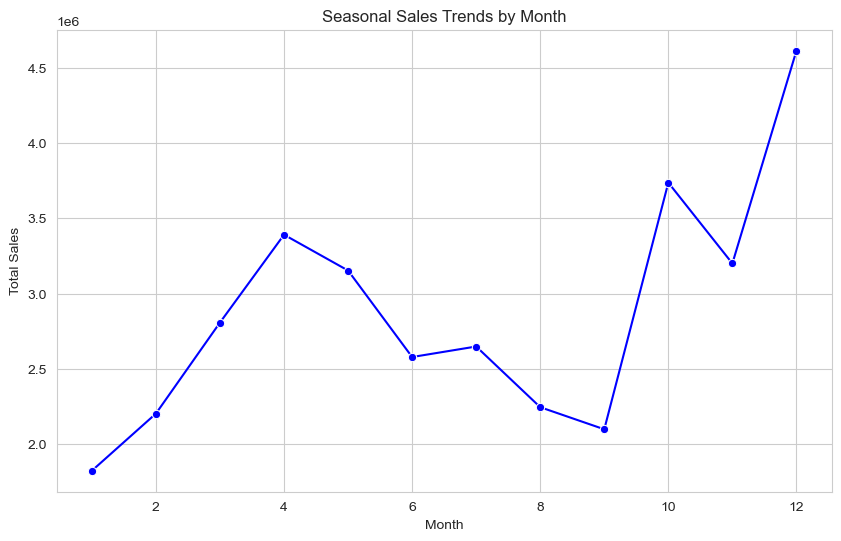

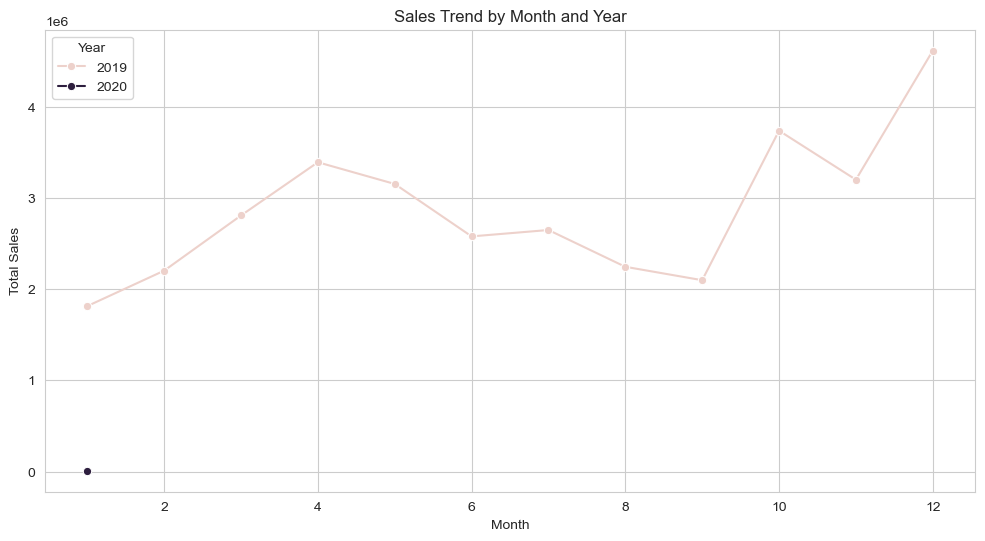

In [53]:
# Analyzing seasonal sales trends
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Plotting seasonal sales trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='b')

# Add labels and title
plt.title('Seasonal Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Display the plot
plt.show()



# Grouping sales data by month and year
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouping data by Year and Month, summing Sales
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting total sales by Month and Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_yearly_sales, marker='o')

# Add labels and title
plt.title('Sales Trend by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Display the plot
plt.show()





# Plotting seasonal sales trends









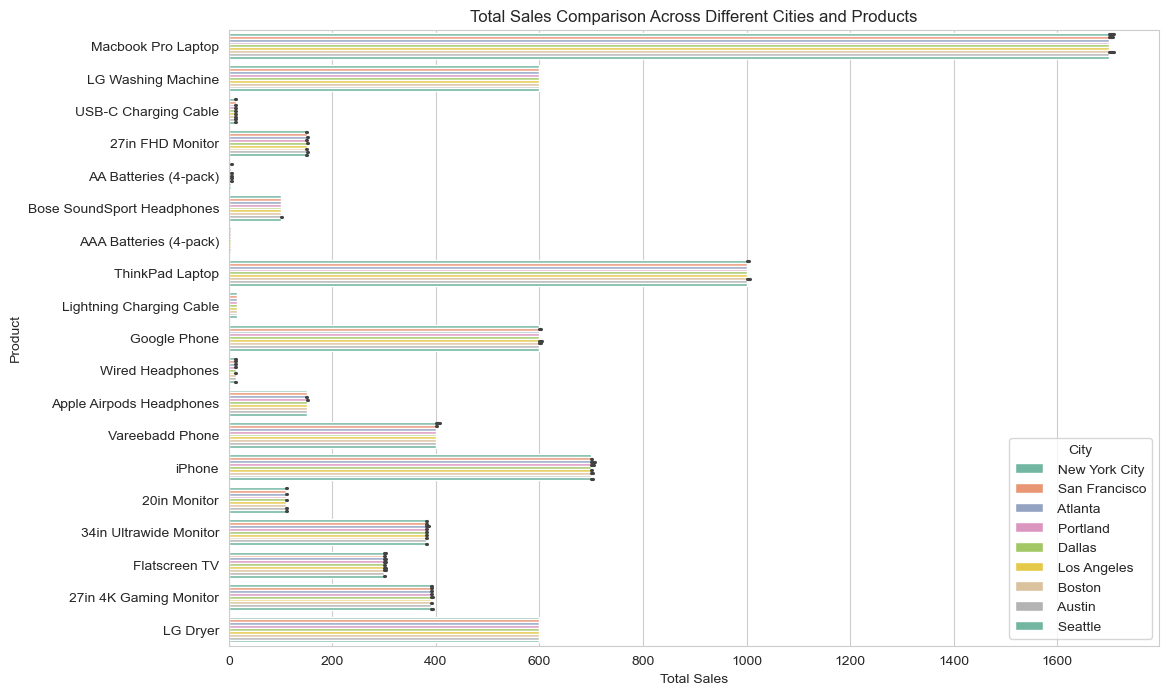

NameError: name 'sales_by_ship_mode' is not defined

In [55]:

# Comparing sales across different ship modes
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product', hue='City', data=data, palette='Set2')

# Add labels and title
plt.title('Total Sales Comparison Across Different Cities and Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')

# Show the plot
plt.show()




sales_by_ship_mode


In [59]:





# Ensure column names are clean
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.lower()  # Convert to lowercase
print(df.head())

# Print column names to verify
print(df.columns)


# Ensure 'Ship Date' column is datetime type
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

print(df['order_date'].dtype)


# Dropping rows where 'Ship Date' couldn't be converted
df = df.dropna(subset=['order_date'])
print(df.isnull().sum())


# Resample sales data by month
df.set_index('order_date', inplace=True)

monthly_sales = df['sales'].resample('M').sum()


print(monthly_sales)






   unnamed:_0  order_id               product  quantity_ordered  price_each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           order_date                        purchase_address  month    sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             city  hour pincode  year 

C:\Users\admin\AppData\Local\Temp\ipykernel_2764\4208604319.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()
